In [105]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [2]:
#Downloading the dataset
url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
from urllib.request import urlretrieve
urlretrieve(url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x2311e183b10>)

In [3]:
df = pd.read_csv("medical.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

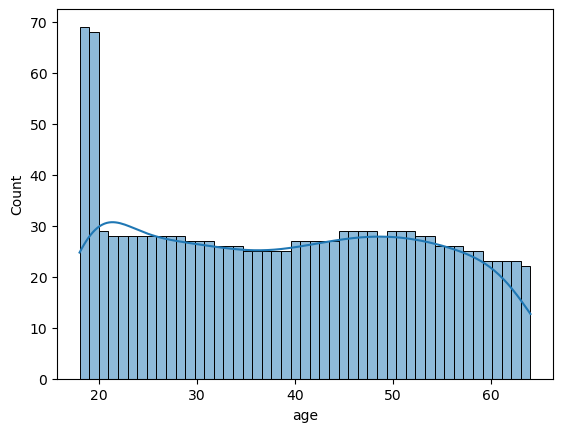

In [6]:
sns.histplot(data=df, x='age', bins = 47, kde = True)
plt.show()

In [8]:
fig = px.histogram(df, 
                   x='age', 
                   nbins=47, 
                   title='Age Distribution',
                   marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(df,
                   x= 'bmi',
                   title='BMI Distribution',
                   marginal='box',
                   color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(df,
                   x = 'charges',
                   title='Anual Medical Charges Distribution',
                   marginal='box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'])
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
px.histogram(df, x = 'smoker', color = 'sex', title = 'Smoker')

In [18]:
fig = px.scatter(df,
           x = 'age',
           y = 'charges',
           color = 'smoker',
           opacity= 0.8,
           hover_data= ['sex'],
           title  =  'Age vs Charges Scatter Plot')
fig.show()

In [19]:
fig = px.scatter(df,
           x = 'bmi',
           y = 'charges',
           color = 'smoker',
           opacity= 0.8,
           hover_data= ['sex'],
           title  =  'BMI vs Charges Scatter Plot')
fig.show()

In [ ]:
#.corr tell us the correlation between two numeric features, its basically like a heatmap but for only two features, thats why when we drew a heatmap earlier we passed df.corr()
df.charges.corr(df.age)

np.float64(0.2990081933306476)

In [21]:
df.charges.corr(df.bmi)

np.float64(0.19834096883362884)

In [22]:
df.charges.corr(df.children)

np.float64(0.06799822684790487)

In [ ]:
#Here smoker is a categorical data with yes and no values so we change that into a numeric data and then find correlation
smoker_numeric = df.smoker.map({'yes' : 1 , 'no' : 0})
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [25]:
df.charges.corr(smoker_numeric)

np.float64(0.7872514304984767)

#### That finishes our EDA for this medical.csv file, now we move on to Linear Regression using a single feature

In [26]:
#First we will try to use smoker and age to predict charges, but hard to do it with categorical data so we will use only age to predict charges for non smoker for now.
non_smoker_df = df[df.smoker == 'no']

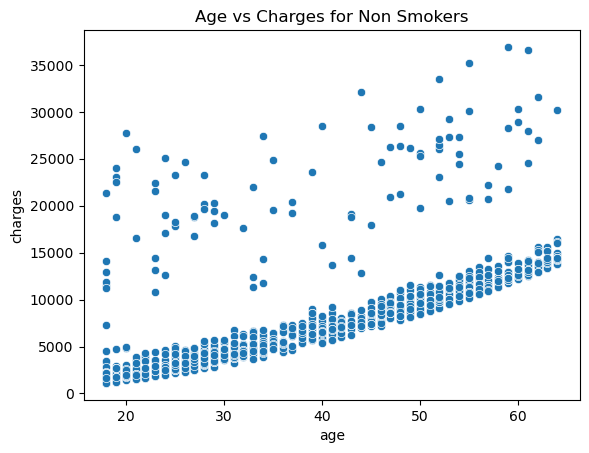

In [27]:
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges')
plt.title('Age vs Charges for Non Smokers')
plt.show()

Here we are trying to fit a line that best fits our data here, so we can say

charges = w x age + b (y = mx + c)

w = weight(slope)
  b = bias(intercept)

In [28]:
def estimate_charge(age, w , b):
  return w * age + b

In [29]:
w = 50
b = 100

In [30]:
estimate_charge(20, w, b)

1100

In [32]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [34]:
inf = estimate_charge(ages, w, b)
inf

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

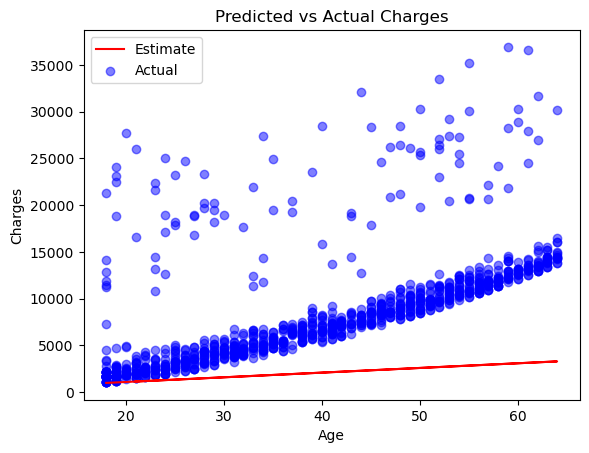

In [36]:
target = non_smoker_df.charges

plt.plot(ages, inf, color = 'red', label = 'Predicted Charges')

plt.scatter(ages, target, color = 'blue', label = 'Actual Charges', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Predicted vs Actual Charges')
plt.legend(['Estimate', 'Actual'])

In [37]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  inf = estimate_charge(ages, w, b)
  plt.plot(ages, inf, color = 'red', label = 'Predicted Charges')
  plt.scatter(ages, target, color = 'blue', label = 'Actual Charges', alpha=0.5)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.title('Predicted vs Actual Charges')
  plt.legend(['Estimate', 'Actual'])
  plt.show()

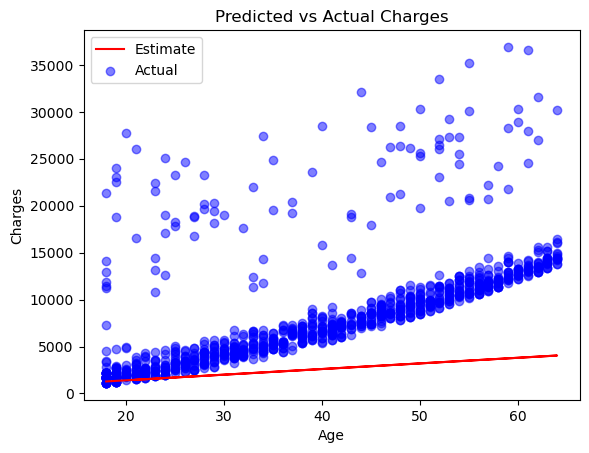

In [38]:
try_parameters(60,200)

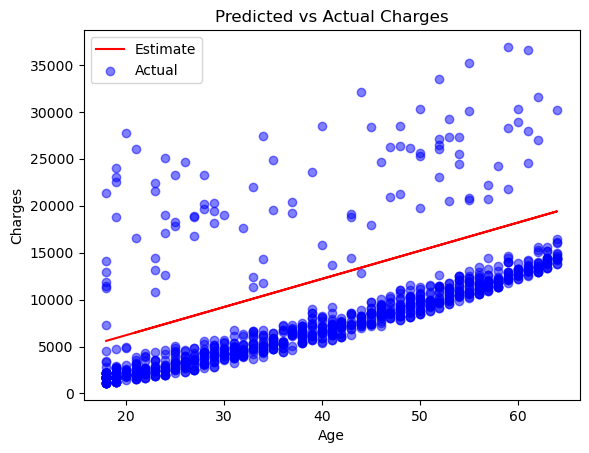

In [42]:
try_parameters(300, 200)

In [45]:
def rmse (targets, predictions) :
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [46]:
target = non_smoker_df['charges']
predicted = estimate_charge(non_smoker_df['age'], 300, 200)
rmse(target, predicted)

np.float64(5897.241421945273)

In [47]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charge(ages, w, b)
  
  plt.plot(ages, predictions, color = 'red', label = 'Predicted Charges')
  plt.scatter(ages, target)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual'])

  loss = rmse(target, predictions)
  print ("Root Mean Squared Loss: ", loss)

Root Mean Squared Loss:  8461.949562575493


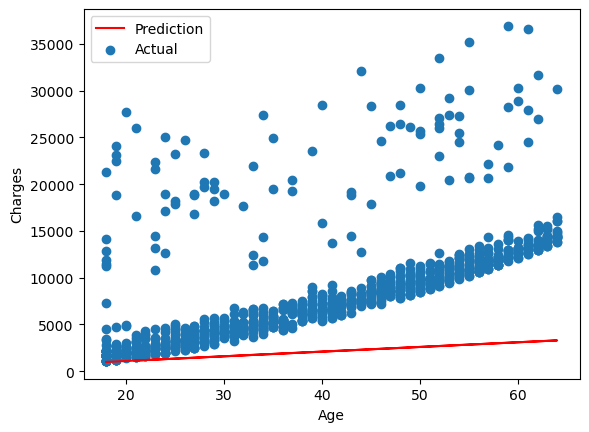

In [48]:
try_parameters(50,100)

Root Mean Squared Loss:  4774.458873587492


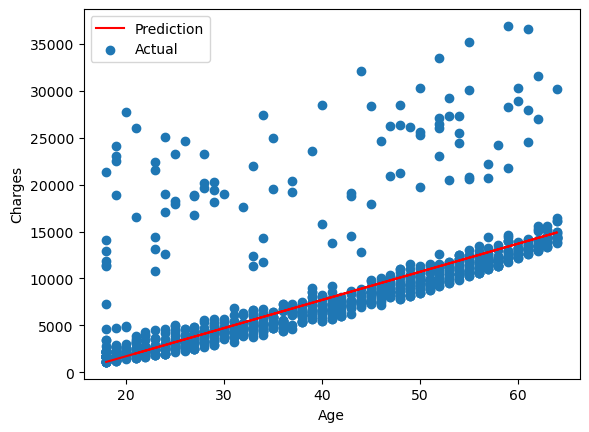

In [59]:
try_parameters(300,-4300)

### Now we want to find the best values of w and b
For this purpose, we can try to eyeball it but its hard, so we can use two methods i think
1. Ordinary least Square(better for smaller datasets)
2. Stochastic gradient descent(better for larger datasets)

In [61]:
model = LinearRegression()

In [62]:
input = non_smoker_df[['age']]
target = non_smoker_df.charges

In [63]:
model.fit(input, target)

LinearRegression()

In [64]:
#try out the model
model.predict(np.array([[23],
                        [37],
                        [61]]))

c:\Users\Kshitiz Rai\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [65]:
predictions = model.predict(input)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [66]:
rmse(target, predictions)

np.float64(4662.505766636395)

In [67]:
#In scikit-learn
#w
model.coef_
#b
model.intercept_

np.float64(-2091.4205565650827)

In [ ]:
##Now if we want to include bmi aswell in our input for our model
input = non_smoker_df[['age', 'bmi']]
target = non_smoker_df['charges']
model = LinearRegression().fit(input, target)
predictions = model.predict(input)
loss = rmse(target, predictions)
print("Loss: ", loss)
#4662.5 and 4662.312 so negligeable difference

Loss:  4662.3128354612945


In [70]:
non_smoker_df.charges.corr(non_smoker_df.bmi)
#From this we can say that there's no real relation between bmi and charges for smoker in the model , and if there's any even that is accidental

np.float64(0.08403654312833271)

In [71]:
#Lets try to add children aswell as an input to our model,
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542197)

In [74]:
input = non_smoker_df[['age', 'bmi', 'children']]
target = non_smoker_df.charges
model = LinearRegression().fit(input,target)
predictions= model.predict(input)
loss = rmse(target, predictions)
print("Loss: ", loss)

Loss:  4608.470405038247


#### We've only done like things for non smokers and not to the whole dataset, we can try to train a linear regression model to the whole dataset or even to only the smoker column of the dataset

In [88]:
#For both smokers and non-smoker
input = df[['age', 'bmi', 'children']]
target = df.charges
model = LinearRegression().fit(input,target)
predictions= model.predict(input)
loss = rmse(target, predictions)
print("Loss: ", loss)

Loss:  11355.317901125973


##### Now we'll use categorical data to train our model, we cant directly deal with categorical data so we have to first convert them into number.
1. Now if there are only two values in categorical then we go for 0 and 1 0=> no, 1 => yes
2. If there are some order related to the categorical data and the thing to predict we can use numbers to replace the data
3. If no relation we use one hot encoding 

<Axes: xlabel='smoker', ylabel='charges'>

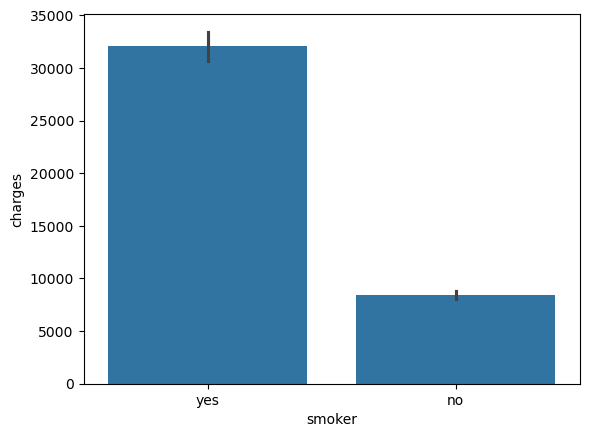

In [76]:
#We add the smoker category as input into our model.

sns.barplot(data = df, x = 'smoker', y ='charges')

In [81]:
smoker_codes = {'no' : 0, 'yes' : 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [84]:
df.charges.corr(df.smoker_code)

np.float64(0.7872514304984767)

In [85]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [89]:
input = df[['age', 'bmi', 'children','smoker_code']]
target = df.charges
model = LinearRegression().fit(input,target)
predictions= model.predict(input)
loss = rmse(target, predictions)
print("Loss: ", loss)
#Almost a 50% reduction in loss

Loss:  6056.439217188081


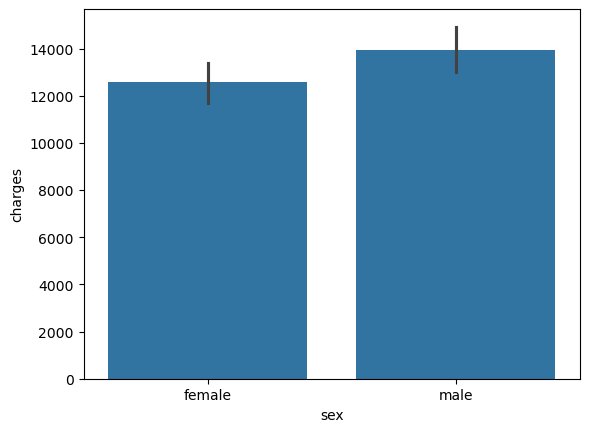

In [91]:
#Now we'll try to add sex aswell in our model
sns.barplot(data = df, x= 'sex', y = 'charges')
plt.show()

In [94]:
sex_codes = {'female' : 0 , 'male' : 1}
df['sex_code'] = df.sex.map(sex_codes)

In [96]:
input = df[['age', 'bmi', 'children','smoker_code', 'sex_code']]
target = df.charges
model = LinearRegression().fit(input,target)
predictions= model.predict(input)
loss = rmse(target, predictions)
print("Loss: ", loss)
#negligeable change

Loss:  6056.100708754546


In [100]:
#Next we'll add up the region to our model to see if there's any relation or change in the loss of the final value
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [101]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [102]:
df[['northeast','northwest','southeast','southwest']] = one_hot

In [103]:
#Now train the model with the region in input aswell
input = df[['age', 'bmi', 'children','smoker_code', 'sex_code','northeast','northwest','southeast','southwest']]
target = df.charges
model = LinearRegression().fit(input,target)
predictions= model.predict(input)
loss = rmse(target, predictions)
print("Loss: ", loss)

Loss:  6041.6796511744515


In [106]:
#Now we want to standardize our inputs(idk what that means yet)
numeric_cols = ['age' , 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [108]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [109]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [110]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [111]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [112]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
catergorical_data = df[cat_cols].values

In [115]:
input = np.concatenate((scaled_inputs, catergorical_data), axis = 1)
target = df.charges

model = LinearRegression().fit(input, target)
predictions = model.predict(input)
loss = rmse(target, predictions)
print("Loss: ", loss)

Loss:  6041.6796511744515
